## Stern-Brocot

In [6]:
def SternBrocot(nr,dr,n1,d1,n2,d2):
    if (nr == n1 and dr == d1) or (nr == n2 and dr == d2):
        return
    nChild = n1 + n2
    dChild = d1 + d2
    if (nr / dr) < (nChild / dChild):
        print("L",end="")
        SternBrocot(nr,dr,n1,d1,nChild,dChild)
    else:
        print("R",end="")
        SternBrocot(nr,dr,nChild,dChild,n2,d2)

SternBrocot(5,7,0,1,1,0)
print("\n")
SternBrocot(828,223,0,1,1,0)

LRRLR

RRRLRRLLRRRRRRRRRRRRRRRLR

## Copying Books

In [8]:
arr = [12,34,67,90]
number = 2
maxi = 0

# if all array values were the same we'd have to have another consideration in partitioning the pages between scribes

for n in arr:
    maxi += n

def isValid(arr, barrier,n):
  writer = 1
  pages = 0
  for i in range(len(arr)):
    if barrier < arr[i]:
      return False
    if (pages + arr[i]) <= barrier:
      pages += arr[i]
    else:
      writer += 1
      pages = arr[i]
  if writer > n:
    return False
  return True
def defineBarrier(arr,init,final,n):
   i = init
   f = final
   barrier = -1
   while i <= f:
       medium  = (i+f) // 2
       if isValid(arr,medium,n) == True:
           barrier = medium
           f = medium - 1
       else:
           i = medium + 1
   aux = 0
   for pgs in arr:
     if aux + pgs <= barrier:
       aux += pgs
       print(pgs,end=" ")
     else:
       print("\\",end=" ")
       aux = pgs
       print(pgs,end=" ")
defineBarrier(arr,arr[0],maxi,number)

12 34 67 \ 90 

## Ejercicio BFS

fatal: destination path 'algorithmic_complexity' already exists and is not an empty directory.


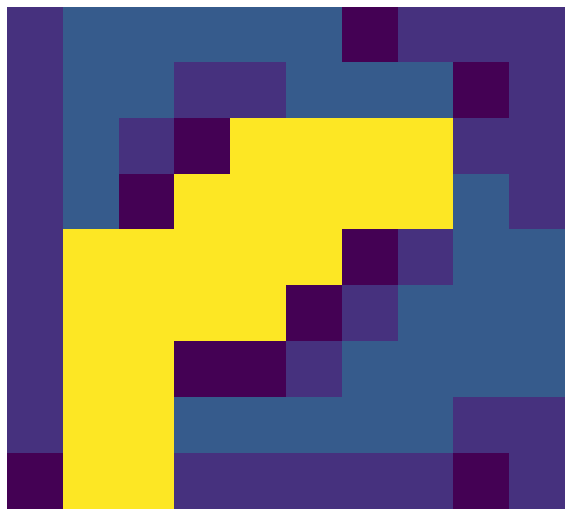

In [10]:
#!git clone https://github.com/lmcanavals/algorithmic_complexity.git
import algorithmic_complexity.mazebuilder as mb
import matplotlib.pyplot as plt

def drawMaze(maze):
  _, ax = plt.subplots(figsize=(10, 10))
  ax.imshow(maze)
  ax.axis("off")

class Node:
    def __init__(self,y,x) -> None:
        self.y = y
        self.x = x
        self.parent = None
    def setParent(self,p):
        self.parent = p
    def getParent(self):
        return self.parent
    def getData(self):
        return self.y, self.x

def isValid(y,x,matrix):
    if y >= len(matrix) or x >= len(matrix[0]) or y < 0 or x < 0:
        return False
    if matrix[y][x] == 2 or matrix[y][x] == 1:
            return False
    pos = [(y,x-1),(y+1,x-1),(y+1,x)]
    for r,c in pos:
        if r >= len(matrix) or c >= len(matrix[0]) or r < 0 or c < 0:
            return False
        if matrix[r][c] == 1:
            return False
    return True

def bfs(matrix,yi, xi, yf, xf):
    init = Node(yi,xi)
    init.setParent(None)
    queue = [(yi, xi,init)]
    res = None
    while queue:
        y, x, node = queue.pop(0)
        if y == yf and x == xf:
            res = node
            break
        pos = [(y - 1,x),(y + 1,x),(y,x - 1),(y,x + 1)]
        for r,c in pos:
            if isValid(r,c,matrix):
                matrix[r][c] = 2
                n = Node(r,c)
                n.setParent(node)
                queue.append((r,c,n))
    
    while res != None:
        y, x = res.getData()
        pos = [(y,x),(y,x-1),(y+1,x-1),(y+1,x)]
        for r,c in pos:
           matrix[r][c] = 7
        res = res.getParent()
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j] == 1:
                matrix[i][j] = 0
            elif matrix[i][j] == 0:
                matrix[i][j] = 1
            elif matrix[i][j] == 2:
                matrix[i][j] = 2
    drawMaze(matrix)



with open("datosEjercicioBFS.txt",mode='r') as file:
    n, m = map(int,file.readline().strip().split())
    matrix = []
    for i in range(n):
        row = list(map(int,file.readline().strip().split()))
        matrix.append(row)
    line = file.readline().strip().split()
    line.pop()
    yi, xi, yf, xf = list(map(int,line))
    bfs(matrix,yi, xi, yf, xf)



